# Data Transformation

## Import Dependency

In [1]:
!pip install numpy matplotlib scikit-learn torch

  Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl.metadata (5.6 kB)
  Using cached matplotlib-3.7.5-cp38-cp38-win_amd64.whl.metadata (5.8 kB)
  Using cached torch-2.4.1-cp38-cp38-win_amd64.whl.metadata (27 kB)
  Using cached contourpy-1.1.1-cp38-cp38-win_amd64.whl.metadata (5.9 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.54.1-cp38-cp38-win_amd64.whl.metadata (167 kB)
  Using cached kiwisolver-1.4.7-cp38-cp38-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-10.4.0-cp38-cp38-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl.metadata (5.1 kB)
  Using cached importlib_resources-6.4.5-py3-none-any.whl.metadata (4.0 kB)
  Using cached scipy-1.10.1-cp38-cp38-win_amd64.whl.metadata (58 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
  Using cached filelock-3.16.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached sympy-1.

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
import torch

## Import Raw Dataset

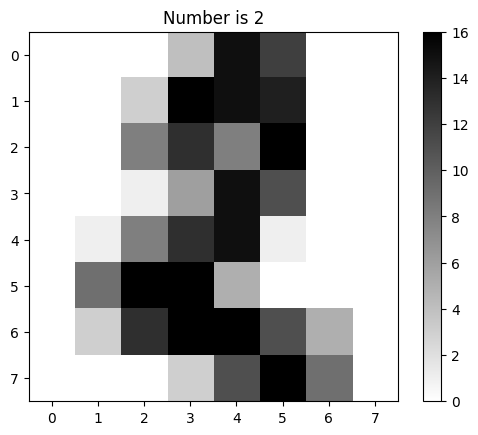

In [3]:
digits = datasets.load_digits()

images = torch.tensor(digits.images, dtype=torch.float32)
targets = torch.tensor(digits.target, dtype=torch.int64)

plt.imshow(images[2].numpy(), cmap=plt.cm.gray_r, interpolation="nearest")
plt.title(f'Number is {targets[2].numpy()}')
plt.colorbar()
plt.show()

## Encode The Targets

In [4]:
import torch.nn.functional as torch_function

encoded_targets = torch_function.one_hot(targets, num_classes=10).to(float)
encoded_targets.shape

torch.Size([1797, 10])

## Flatten The Images

In [5]:
flattened_images = images.reshape(-1, 8**2)
flattened_images.shape

torch.Size([1797, 64])

## Split Dataset

In [6]:
from sklearn.model_selection import train_test_split

images_train, images_test, targets_train, targets_test = train_test_split(
    flattened_images, encoded_targets, test_size=0.2, random_state=42
)

## Exporting Transformed Dataset

In [8]:
torch.save((images_train, targets_train), '../../../datasets/processed/train_data.pt')
torch.save((images_test, targets_test), '../../../datasets/processed/test_data.pt')